# Web Scrapping 99acres.com & Building Model to Predict House Pricing


# Part 1 - Web Scrapping

In [1]:
#Importing the libraries for web scrapping
from selenium import webdriver
from bs4 import BeautifulSoup
import requests

In [2]:
#Creating list to store the values
project_name=[]
specification=[]
pareas=[]
sareas=[]
prices=[]
BHK=[]
housetype=[]

#Running the scrapper for 25 pages to get details at 99acres.com
for page in range(1,26):
    URL='https://www.99acres.com/property-in-hadapsar-pune-ffid-page-'+str(page)
    URL = 'https://www.99acres.com/property-in-hadapsar-pune-ffid-page-1'
    page = requests.get(URL)

    soup = BeautifulSoup(page.content, 'html.parser')
    results=soup.find_all( class_='srpTuple__tupleTable')

    #getting indicidual results for each property
    for x in results:
        
        #finding Project name
        name=x.find(id='srp_tuple_society_heading')
        project_name.append(name.text)
        
        #finding project specification
        spec = x.find('h2')
        specification.append(spec.text)
        
        #finding project prices
        price=x.find(id='srp_tuple_price')
        prices.append(price.text)
        
        #finding Primary Area
        parea=x.find(id='srp_tuple_primary_area')
        parea=(parea.text).split(" ")
        pareas.append(parea[0])
        
        #finding secondary Area
        sarea=x.find(id='srp_tuple_secondary_area')
        sarea=(sarea.text).lstrip("(").split(" ")
        sareas.append(sarea[0])
        
        #finding house type
        if("Super" in sarea):
            housetype.append("Super Area")
        else:
            housetype.append("Carpet Area")
        bedroom=x.find(id='srp_tuple_bedroom')
        BHK.append(bedroom.text)

print(project_name)
print(specification)
print(prices)
print(pareas)
print(BHK)
print(housetype)
    

['Ambrosia Alley', 'Ambrosia Alley', 'Unika', 'Unika', 'Nyati Evolve', 'Nyati Evolve', 'Shapoorji Joyville Hadapsar Annexe', 'Shapoorji Joyville Hadapsar Annexe', 'Shapoorji Joyville Hadapsar Annexe', 'Shapoorji Joyville Hadapsar Annexe', 'Kumar Pebble Park', 'Ratan Neptune', 'Ratan Neptune', 'Shapoorji Joyville Hadapsar Annexe', 'Shapoorji Joyville Hadapsar Annexe', 'Marvel Bounty', 'Shapoorji Joyville Hadapsar Annexe', 'Shapoorji Joyville Hadapsar Annexe', 'Shapoorji Joyville Hadapsar Annexe', 'Godrej River Greens', 'Godrej River Greens', 'Kalpataru Serenity', 'Kalpataru Serenity', 'Kalpataru Serenity', 'Kalpataru Serenity', 'Kalpataru Serenity', 'Ambrosia Alley', 'Ambrosia Alley', 'Unika', 'Unika', 'Nyati Evolve', 'Nyati Evolve', 'Shapoorji Joyville Hadapsar Annexe', 'Shapoorji Joyville Hadapsar Annexe', 'Shapoorji Joyville Hadapsar Annexe', 'Shapoorji Joyville Hadapsar Annexe', 'Kumar Pebble Park', 'Ratan Neptune', 'Ratan Neptune', 'Shapoorji Joyville Hadapsar Annexe', 'Shapoorji J

## Part 2 - Converting the lists to dataframe for manupulation

In [3]:
import pandas as pd 
  
# dictionary of lists 
dic = {'Project Name': project_name, 'Specification': specification, 'BHK':BHK,'Primary Area': pareas,
       'Secondary Area':sareas,'Area Type':housetype,'Value':prices} 
    
df = pd.DataFrame(dic)
df.to_csv('project.csv', index = False)
df.head()

,Project Name,Specification,BHK,Primary Area,Secondary Area,Area Type,Value
0,Ambrosia Alley,2 BHK Residential Apartment in Hadapsar,2 BHK,"1,022",95,Super Area,₹ 77.77 Lac
1,Ambrosia Alley,1 BHK Residential Apartment in Hadapsar,1 BHK,698,65,Super Area,₹ 55.55 Lac
2,Unika,2 BHK Residential Apartment in Hadapsar,2 BHK,767,71,Carpet Area,₹ 68.2 Lac
3,Unika,3 BHK Residential Apartment in Hadapsar,3 BHK,955,89,Carpet Area,₹ 89.56 Lac
4,Nyati Evolve,3 BHK Residential Apartment in Magarpatta,3 BHK3 Baths,"963-1,241",89-115,Carpet Area,"₹ 1.06 - 1.36 Cr₹ 10,982/sq.ft."


### Understanding the data and manupluation

In [4]:
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
data= pd.read_csv("projects.csv")
data=data.replace("Carpet Area",0)
data=data.replace("Super Area",1)
data.head()


,Project Name,Specification,BHK,Primary Area,Secondary Area,Area Type,Value
0,Ambrosia Alley,2 BHK Residential Apartment in Hadapsar,2,1022,95,1,78
1,Ambrosia Alley,1 BHK Residential Apartment in Hadapsar,1,698,65,1,56
2,Unika,2 BHK Residential Apartment in Hadapsar,2,767,71,0,68
3,Unika,3 BHK Residential Apartment in Hadapsar,3,955,89,0,90
4,Nyati Evolve,3 BHK Residential Apartment in Magarpatta,3,963,89,0,106


In [6]:
#finding correlation
names=['BHK','Primary Area','Secondary Area','Area Type','Value']
df=data[names]
correlations= df.corr()
print(correlations)

                     BHK  Primary Area  Secondary Area  Area Type     Value
BHK             1.000000      0.769300        0.768985  -0.280248  0.763581
Primary Area    0.769300      1.000000        0.999899   0.249722  0.847083
Secondary Area  0.768985      0.999899        1.000000   0.252394  0.846220
Area Type      -0.280248      0.249722        0.252394   1.000000  0.096641
Value           0.763581      0.847083        0.846220   0.096641  1.000000


We can see that primary area and secondary area has the maximum corelation with Value

## Expolatory Data Analysis

<AxesSubplot:xlabel='Secondary Area', ylabel='Value'>

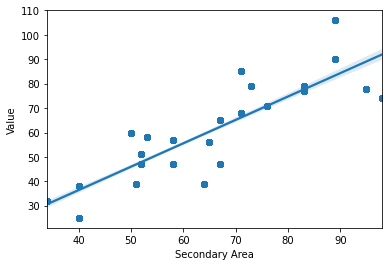

In [7]:
sns.regplot(x='Secondary Area',y='Value',data=data)

<AxesSubplot:xlabel='BHK', ylabel='Value'>

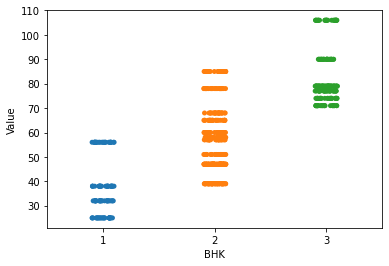

In [8]:
sns.stripplot(x='BHK', y='Value',data=data)

<AxesSubplot:xlabel='Secondary Area', ylabel='Value'>

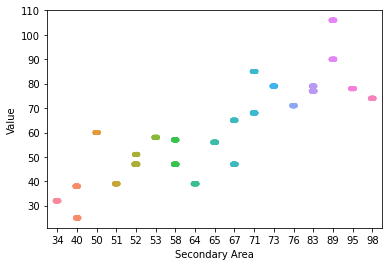

In [9]:
sns.stripplot(x='Secondary Area', y='Value',data=data, size=5)

## Splitting data as test and train

In [10]:
c=['BHK','Primary Area','Secondary Area','Area Type']
df=data[c]
y=data['Value']

x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=0)
x_train.head()

,BHK,Primary Area,Secondary Area,Area Type
577,2,767,71,0
312,1,435,40,0
122,3,1056,98,0
569,2,568,53,0
509,1,430,40,0


# Part 3 - Running various models

## 1) Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [12]:
linear_pred=reg.predict(x_test)
linear_acc=(metrics.mean_absolute_error(y_test,linear_pred))
print("Error of Linear Regression is around",round(linear_acc,2),"Lakh")

Error of Linear Regression is around 7.61 Lakh


## 2) Decision Tree

In [13]:
from sklearn.tree import DecisionTreeRegressor
tr_regressor = DecisionTreeRegressor()
tr_regressor.fit(x_train,y_train)


DecisionTreeRegressor()

In [14]:
tr_pred=tr_regressor.predict(x_test)
tr_acc=(metrics.mean_absolute_error(y_test,tr_pred))
print("Error of Decision Tree Regression is around",round(tr_acc,2),"Lakh")

Error of Decision Tree Regression is around 0.36 Lakh


## 3) Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(max_depth = 12)
random_forest.fit(x_test,y_test)

RandomForestRegressor(max_depth=12)

In [16]:
rf_pred=random_forest.predict(x_test)
rf_acc=(metrics.mean_absolute_error(y_test,rf_pred))
print("Error of Random forest Regression is around",round(rf_acc,2),"Lakh")

Error of Random forest Regression is around 0.47 Lakh


# 4) Gradient Boosting Regressor

In [17]:
from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor()

gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [18]:
gbr_pred=gbr.predict(x_test)
gbr_acc=(metrics.mean_absolute_error(y_test,gbr_pred))
print("Error of Random forest Regression is around",round(gbr_acc,2),"Lakh")

Error of Random forest Regression is around 0.86 Lakh


# Conclusion

In [19]:
print("Linear Regression Model Error is ",round(linear_acc,2),"Lakh")
print("Decision tree  Regression Model Error is ",round(tr_acc,2),"Lakh")
print("Random Forest Regression Model Error is ",round(rf_acc,2),"Lakh")
print("Gradient Boosting Regression Model Error is ",round(gbr_acc,2),"Lakh")

Linear Regression Model Error is  7.61 Lakh
Decision tree  Regression Model Error is  0.36 Lakh
Random Forest Regression Model Error is  0.47 Lakh
Gradient Boosting Regression Model Error is  0.86 Lakh


Therefore the best model for this scenario seems to be Decision tree Regressor